# 第2章 感知机

1．感知机是根据输入实例的特征向量$x$对其进行二类分类的线性分类模型：

$$
f(x)=\operatorname{sign}(w \cdot x+b)
$$

感知机模型对应于输入空间（特征空间）中的分离超平面$w \cdot x+b=0$。

2．感知机学习的策略是极小化损失函数：

$$
\min _{w, b} L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)
$$

损失函数对应于误分类点到分离超平面的总距离。

3．感知机学习算法是基于随机梯度下降法的对损失函数的最优化算法，有原始形式和对偶形式。算法简单且易于实现。原始形式中，首先任意选取一个超平面，然后用梯度下降法不断极小化目标函数。在这个过程中一次随机选取一个误分类点使其梯度下降。
 
4．当训练数据集线性可分时，感知机学习算法是收敛的。感知机算法在训练数据集上的误分类次数$k$满足不等式：

$$
k \leqslant\left(\frac{R}{\gamma}\right)^{2}
$$

当训练数据集线性可分时，感知机学习算法存在无穷多个解，其解由于不同的初值或不同的迭代顺序而可能有所不同。


### 二分类模型
$f(x) = sign(w\cdot x + b)$

$\operatorname{sign}(x)=\left\{\begin{array}{ll}{+1,} & {x \geqslant 0} \\ {-1,} & {x<0}\end{array}\right.$

给定训练集：

$T=\left\{\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{N}, y_{N}\right)\right\}$

定义感知机的损失函数 

$L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)$

---
#### 算法

随机梯度下降法 Stochastic Gradient Descent

随机抽取一个误分类点使其梯度下降。

$w = w + \eta y_{i}x_{i}$

$b = b + \eta y_{i}$

当实例点被误分类，即位于分离超平面的错误侧，则调整$w$, $b$的值，使分离超平面向该无分类点的一侧移动，直至误分类点被正确分类

拿出iris数据集中两个分类的数据和[sepal length，sepal width]作为特征

In [1]:
import pandas as pd # pip install pandas
import numpy as np
from sklearn.datasets import load_iris # pip install scikit-learn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
"""
    iris数据集中一共150行记录. 
    特征有4个: 花萼长度, 花萼宽度, 花瓣长度, 花瓣宽度。保存在iris.data中, 二维数组, 150行, 每一行为4个特征的取值. 
    标记label(target)类别有3个: Setosa, Versicolour, Virginica. 分别用0, 1, 2表示. 
    前50个的标记为0, 中间50为1, 后50为2. 
"""
iris = load_iris() # 加载iris数据集
""" DataFrame(data, index, columns, dtype, copy)
    一个数据表格, 类似excel, 有行有列
    data: ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    index: Index or array-like. 简单理解为行号(名)
    columns: Index or array-like. 列名(号)
"""
df = pd.DataFrame(iris.data, columns=iris.feature_names) # 创建数据表, 将数据集的特征数据放入
df['label'] = iris.target # 给df增加一列, 列名是label, 对应数据是iris的标记数据, 此时表格shape是(150, 5)
# print(df)

In [3]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
] # 列名太长了, 改改名, 去掉'(cm)'
df.label.value_counts() # 算一下多少个不同数据值和每个有多少个, 区别于count(), 见下方打印
print(df.label.count())
print(df.label.value_counts())

150
label
0    50
1    50
2    50
Name: count, dtype: int64


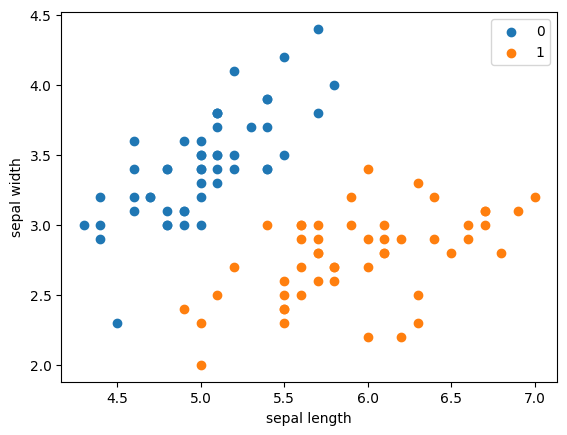

In [4]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0') # 把花萼长度和宽度的前50展示在图上, 图例为0, 形式为散点图
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1') # 中间50个展示出来, 图例为1
plt.xlabel('sepal length') # 横坐标是长度
plt.ylabel('sepal width') # 纵坐标是宽度
plt.legend() # 生成图像

In [5]:
""" iloc(index, columns)
    用于根据行列号对数据进行切片
    index: 哪一行或哪几行
    columns: 哪一列或哪几列
"""
data = np.array(df.iloc[:100, [0, 1, -1]]) # 切点数据下来, 前100行, 前两列和最后一列(-1表示最后)
# print(data)

In [6]:
X, y = data[:,:-1], data[:,-1] # X为二维数组, 100行, 每一行表示花萼长度和宽度两个特征; y是标记, 长度100
# print(X, y)

In [7]:
y = np.array([1 if i == 1 else -1 for i in y]) # 将y的前50个从0改成-1, 这样就满足了目标模型sign
# print(y)

## Perceptron

In [8]:
# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class Model:
    def __init__(self): # 初始化函数
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)
        self.b = 0 # 令b=0
        self.l_rate = 0.1 # 学习率0.1
        # self.data = data

    def sign(self, x, w, b):
        y = np.dot(x, w) + b # x和w点积后, 再加上b
        return y # 返回结果y

    # 随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False # 训练中是否有错误
        while not is_wrong: # 循环直到没有错误
            wrong_count = 0 # 记录分类错误的数量
            for d in range(len(X_train)): # 遍历整个, 100次
                X = X_train[d] # 第d-1个花的特征
                y = y_train[d] # 标记
                if y * self.sign(X, self.w, self.b) <= 0: # 判断是否分类错误(y与sign结果同号即分类正确)
                    self.w = self.w + self.l_rate * np.dot(y, X) # 分类错误, 更新w
                    self.b = self.b + self.l_rate * y # 更新b
                    wrong_count += 1 # 错误数自增
            if wrong_count == 0: # 错误数量为0个
                is_wrong = True # 没错了!
        return 'Perceptron Model!' # 返回字符串

    def score(self):
        pass

In [9]:
perceptron = Model() # 生成感知机对象, 并初始化
perceptron.fit(X, y) # 训练!找的合适的w和b
# print(perceptron.w, perceptron.b) # 手动验证一下, 取第一个w=(7.8,-10.) b=-12.1 x=(5.1,3.5) y=-1 => sign=-7.32 => 分类到-1 √

'Perceptron Model!'

C:\Users\yy\AppData\Local\Temp\ipykernel_18808\3618385641.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
C:\Users\yy\AppData\Local\Temp\ipykernel_18808\3618385641.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')


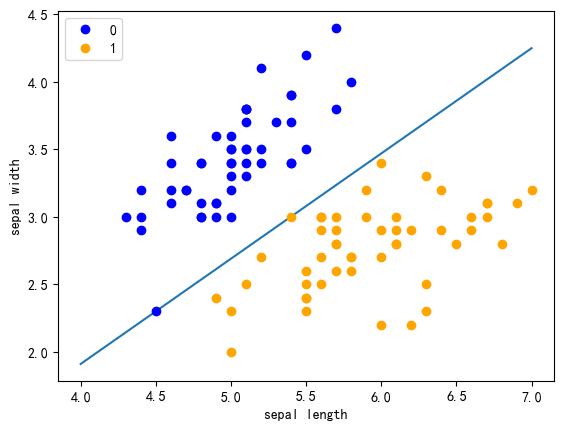

In [19]:
x_points = np.linspace(4, 7, 10) # 4到7, 生成10个数, 间隔相同
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1] # 画出感知机的线, 使前50和中间50分别在感知机线的两边
plt.plot(x_points, y_) # 展示到图上

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0') # 前50个
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1') # 中间50个
plt.xlabel('sepal length') # x坐标轴名
plt.ylabel('sepal width') # y坐标轴名
plt.legend() # 生成图

### scikit-learn实例

In [20]:
import sklearn # 导包
from sklearn.linear_model import Perceptron # 导包

In [12]:
sklearn.__version__ # 版本号

'1.2.2'

In [39]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000, 
                 shuffle=True) # 使用sklearn的感知机
clf.fit(X, y) # 相同数据集, 训练

Perceptron()

In [40]:
# Weights assigned to the features.
print(clf.coef_) # 打印训练后的w

[[ 23.2 -38.7]]


In [41]:
# 截距 Constants in decision function.
print(clf.intercept_) # 打印训练后的b

[-5.]


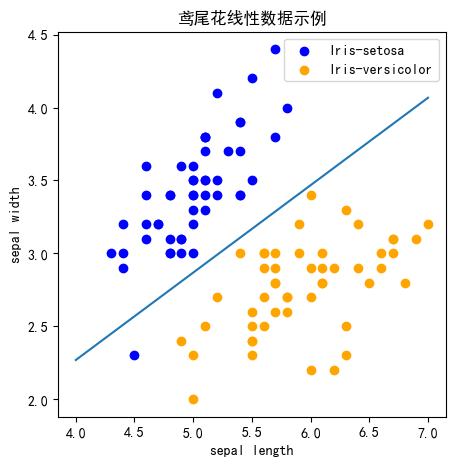

In [42]:
# 画布大小
plt.figure(figsize=(5,5)) # 太大了, 改成5*5了

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei'] # 字体
plt.rcParams['axes.unicode_minus'] = False # 字符显示
plt.title('鸢尾花线性数据示例') # 标题

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',) # 前50显示
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor') # 中间50

# 画感知机的线
x_ponits = np.arange(4, 8) # 4个点
"""
    注意: 现在x轴是长度, y轴是宽度, 对应向量X的两个特征, 如果加上sign函数的结果那图像就需要增加一维(一个坐标轴).
    所以, 下方的公式是来自z=dot(x,w)+b, 令z=0, x和w都是向量. 
    化简公式, 得到0=x_1*w_1+x_2*w_2+b, 再作恒等变形, 得到x_2=-(x_1*w_1+b)/w_2, 
    这里的x_1就是x_points的一个值, x_2就是y_中的一个值, 
    w_1是clf.coef_[0][0], w_2是clf.coef_[0][1], b是clf.intercept_
"""
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1] # 感知机的线在x,y轴(长度,宽度轴)的投影
plt.plot(x_ponits, y_) # 显示

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend() # 展示

**注意 !**

在上图中，有一个位于左下角的蓝点没有被正确分类，这是因为 SKlearn 的 Perceptron 实例中有一个`tol`参数。

`tol` 参数规定了如果本次迭代的损失和上次迭代的损失之差小于一个特定值时，停止迭代。所以我们需要设置 `tol=None` 使之可以继续迭代：

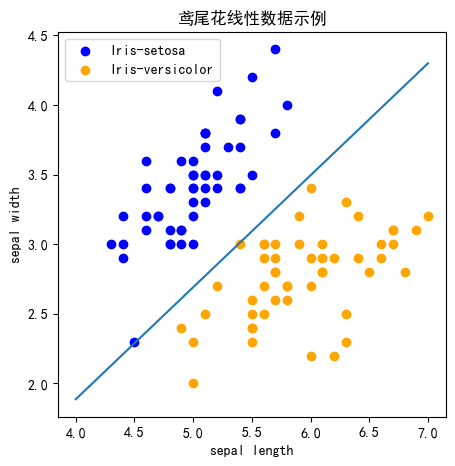

In [32]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000,
                 tol=None,
                 shuffle=True) # 增加tol=None参数
clf.fit(X, y) # 训练

# 画布大小
plt.figure(figsize=(5,5)) # 同理

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei'] # 同理
plt.rcParams['axes.unicode_minus'] = False # 同理
plt.title('鸢尾花线性数据示例') # 同理

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',) # 同理
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor') # 同理

# 画感知机的线
x_ponits = np.arange(4, 8) # 同理
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1] # 同理
plt.plot(x_ponits, y_) # 同理

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend() # 同理

现在可以看到，所有的两种鸢尾花都被正确分类了。

----

## 第2章感知机-习题

### 习题2.1
&emsp;&emsp;Minsky 与 Papert 指出：感知机因为是线性模型，所以不能表示复杂的函数，如异或 (XOR)。验证感知机为什么不能表示异或。

**解答：**  

对于异或函数XOR，全部的输入与对应的输出如下：  

|<div style="width:20px">$x^{(1)}$</div>|<div style="width:20px">$x^{(2)}$</div>|$y$|
|:-: | :-: | :-: |  
| &nbsp;1 |  &nbsp;1 |-1 | 
| &nbsp;1 | -1 | &nbsp;1 | 
|-1 |  &nbsp;1 | &nbsp;1 | 
|-1 | -1 |-1 | 

参考代码：https://github.com/wzyonggege/statistical-learning-method

本文代码更新地址：https://github.com/fengdu78/lihang-code

习题解答：https://github.com/datawhalechina/statistical-learning-method-solutions-manual

中文注释制作：机器学习初学者公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)